In [1]:
import os
import json
import torch
import pandas as pd
import numpy as np
import networkx as nx
from typing import Tuple, List, Dict, Any
import utils as utils
import matplotlib.pyplot as plt

In [2]:
# Load Results Overview
exp_folder = '/home/djuhera/results/'
results = utils.get_overview_df(exp_folder)
print(results)
# results.head()

    population_size  num_groups     driver   lr  num_iter  patience  \
0             10000           6  bernoulli  1.0      1000       100   
1             10000           9  bernoulli  1.0      1000       100   
2             10000           4  bernoulli  1.0      2000       100   
3             10000           3  bernoulli  1.0      1000       100   
4             10000           8  bernoulli  1.0      1000       100   
5             10000           2  bernoulli  1.0      2000       100   
6             10000           5  bernoulli  1.0      1000       100   
7             10000           3  bernoulli  1.0      1000       100   
8             10000           7  bernoulli  1.0      1000       100   
9             10000           2  bernoulli  1.0      2000       100   
10            10000           8  bernoulli  1.0      2000       100   
11            10000           4  bernoulli  1.0      1000       100   
12            10000          10  bernoulli  1.0      1000       100   
13    

In [3]:
# Extract Relevant AIC, BIC Info

# Log Probs and Num Groups
num_groups = results['num_groups']
log_prob_vals = results['best_log_prob']

# Sort num_groups and apply correct indexing to log_probs! 
num_groups_sorted = num_groups.sort_values()
idx_list = num_groups_sorted.index.tolist()
log_prob_vals_sorted = log_prob_vals.reindex(idx_list)

# Number of Nodes
# g = utils.read_graph('/home/djuhera/graph/traces_graph.json').to_directed()
# g = utils.simplify_graph(g)
# num_nodes = g.number_of_nodes()
num_nodes = 13651

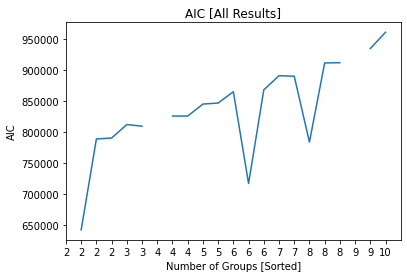

In [4]:
# Compute and Plot AIC for all Results
aic = 2 * num_groups_sorted * num_nodes - 2 * log_prob_vals_sorted
aic = aic.tolist()

x_aic = np.arange(len(aic))
x_aic_labels = num_groups_sorted.tolist()

plt.plot(x_aic, aic)
plt.xticks(x_aic, x_aic_labels)
plt.xlabel("Number of Groups [Sorted]")
plt.ylabel("AIC")
plt.title("AIC [All Results]")
plt.savefig('/home/djuhera/AIC.pdf', bbox_inches = "tight")

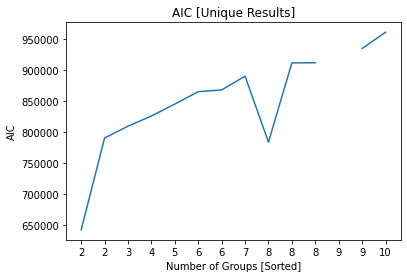

In [5]:
# Compute and Plot AIC for unique Results (no double num_groups!)
aic = 2 * num_groups_sorted * num_nodes - 2 * log_prob_vals_sorted
aic = aic.tolist()

num_groups_sorted_list = num_groups_sorted.tolist()
del_vals = [0, 2, 4, 6, 8, 10, 12, 14]

for i in sorted(del_vals, reverse=True):
    del aic[i]
    del num_groups_sorted_list[i]

# del aic[1]
# del num_groups_sorted_list[1]
# del aic[6+1]
# del num_groups_sorted_list[6+1]
# del aic[7+1]
# del num_groups_sorted_list[7+1]
# del aic[7+1]
# del num_groups_sorted_list[7+1]

x_aic = np.arange(len(aic))
x_aic_labels = num_groups_sorted_list

plt.plot(x_aic, aic)
plt.xticks(x_aic, x_aic_labels)
plt.xlabel("Number of Groups [Sorted]")
plt.ylabel("AIC")
plt.title("AIC [Unique Results]")
plt.savefig('/home/djuhera/AIC_unique.pdf', bbox_inches = "tight")

# x_aic_labels[1] = '2\'\'' 

# plt.plot(x_aic[:4], aic[:4])
# plt.xticks(x_aic[:4], x_aic_labels[:4])
# plt.xlabel("Number of Groups K")
# plt.ylabel("AIC")
# plt.grid()
# # plt.title("AIC Values")
# plt.savefig('/home/djuhera/AIC_unique.pdf', bbox_inches = "tight")

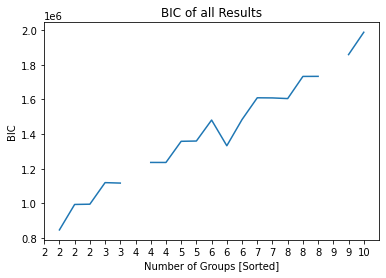

In [6]:
# Compute and Plot BIC for all Results
bic = np.log(num_nodes) * num_groups_sorted * num_nodes - 2 * log_prob_vals_sorted
bic = bic.tolist()

x_bic = np.arange(len(bic))
x_bic_labels = num_groups_sorted.tolist()

plt.plot(x_bic, bic)
plt.xticks(x_bic, x_bic_labels)
plt.xlabel("Number of Groups [Sorted]")
plt.ylabel("BIC")
plt.title("BIC of all Results")
plt.savefig('/home/djuhera/BIC.pdf', bbox_inches = "tight")

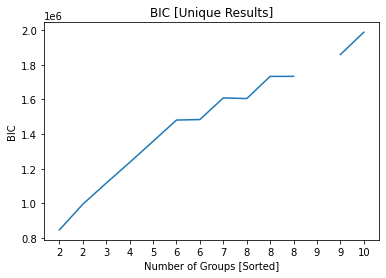

In [7]:
# Compute and Plot BIC for unique Results (no double num_groups!)
bic = np.log(num_nodes) * num_groups_sorted * num_nodes - 2 * log_prob_vals_sorted
bic = bic.tolist()

num_groups_sorted_list = num_groups_sorted.tolist()
del_vals = [0, 2, 4, 6, 8, 10, 12, 14]

for i in sorted(del_vals, reverse=True):
    del bic[i]
    del num_groups_sorted_list[i]

x_bic = np.arange(len(bic))
x_bic_labels = num_groups_sorted_list

plt.plot(x_bic, bic)
plt.xticks(x_bic, x_bic_labels)
plt.xlabel("Number of Groups [Sorted]")
plt.ylabel("BIC")
plt.title("BIC [Unique Results]")
plt.savefig('/home/djuhera/BIC_unique.pdf', bbox_inches = "tight")

In [8]:
# Loss Function Analysis
for f in os.listdir(exp_folder):
    # Current Results Sub-Folder
    trial_dir = os.path.join(exp_folder, f)

    # Get Number of Iterations (Very General)
    config_path = os.path.join(trial_dir, 'config.json')
    with open(config_path, 'r') as fh:
        config = json.load(fh)
    
    num_iters = config['num_iter']

    # Open Log File
    log_path = os.path.join(trial_dir, 'log_out.json')
    if not os.path.exists(log_path):
        continue
    with open(log_path, 'r') as fh:
        log = json.load(fh)

    # Get Loss Values
    loss = []
    for i in range(num_iters):
        iter_info = log[i]
        loss.append(iter_info['best_loss'])
    
    # Make Plot
    if len(loss) > 1000:
        continue
    else:
        x = np.arange(len(loss))
        plt.plot(x, loss)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Function Convergence for DoE")
        plt.grid(True)
        # plt.savefig('/home/djuhera/loss.pdf', bbox_inches = "tight")
        savename = trial_dir + '/loss.pdf'
        plt.savefig(savename, bbox_inches = "tight")
        plt.close()

In [9]:
# Log-Likelihood Function Analysis
for f in os.listdir(exp_folder):
    # Current Results Sub-Folder
    trial_dir = os.path.join(exp_folder, f)

    # Get Number of Iterations (Very General)
    config_path = os.path.join(trial_dir, 'config.json')
    with open(config_path, 'r') as fh:
        config = json.load(fh)
    
    num_iters = config['num_iter']

    # Open Log File
    log_path = os.path.join(trial_dir, 'log_out.json')
    if not os.path.exists(log_path):
        continue
    with open(log_path, 'r') as fh:
        log = json.load(fh)

    # Get Loss Values
    loss = []
    for i in range(num_iters):
        iter_info = log[i]
        loss.append(-1 * iter_info['best_loss'])
    
    # Make Plot
    x = np.arange(len(loss))
    plt.plot(x, loss)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Log-Likelihood")
    plt.title("Log-Likelihood Convergence")
    plt.grid()
    savename = trial_dir + '/log_prob.pdf'
    plt.savefig(savename, bbox_inches = "tight")
    plt.close()

In [10]:
# Computation Time Analysis
for f in os.listdir(exp_folder):
    # Current Results Sub-Folder
    trial_dir = os.path.join(exp_folder, f)

    # Get Number of Iterations (Very General)
    config_path = os.path.join(trial_dir, 'config.json')
    with open(config_path, 'r') as fh:
        config = json.load(fh)
    
    num_iters = config['num_iter']

    # Open Log File
    log_path = os.path.join(trial_dir, 'log_out.json')
    if not os.path.exists(log_path):
        continue
    with open(log_path, 'r') as fh:
        log = json.load(fh)

    # Get Time Values
    time = []
    for i in range(num_iters):
        iter_info = log[i]
        time.append(iter_info['t_ges'])
    
    # Make Plot
    x = np.arange(len(time))
    plt.plot(x, time)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Time [s]")
    plt.title("Time Progression per Iteration")
    plt.grid()
    savename = trial_dir + '/time_progress.pdf'
    plt.savefig(savename, bbox_inches = "tight")
    plt.close()

In [11]:
# Average Population Loss
for f in os.listdir(exp_folder):
    # Current Results Sub-Folder
    trial_dir = os.path.join(exp_folder, f)

    # Get Number of Iterations (Very General)
    config_path = os.path.join(trial_dir, 'config.json')
    with open(config_path, 'r') as fh:
        config = json.load(fh)
    
    num_iters = config['num_iter']

    # Open Log File
    log_path = os.path.join(trial_dir, 'log_out.json')
    if not os.path.exists(log_path):
        continue
    with open(log_path, 'r') as fh:
        log = json.load(fh)

    # Get Time Values
    pop_loss = []
    for i in range(num_iters):
        iter_info = log[i]
        pop_loss.append(iter_info['avg_loss_population'])
    
    # Make Plot
    x = np.arange(len(pop_loss))
    plt.plot(x, pop_loss)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Average Population Loss")
    plt.title("Population Loss per Iteration")
    plt.grid()
    savename = trial_dir + '/avg_pop_loss.pdf'
    plt.savefig(savename, bbox_inches = "tight")
    plt.close()

In [ ]:
# config_path = os.path.join(exp_folder, 'd69b4dd36396425c9a8ebcd55ebae72d/log_out.json')
# with open(config_path, 'r') as fh:
#     config = json.load(fh)
# # print(config)

# model_path = os.path.join(exp_folder, 'd69b4dd36396425c9a8ebcd55ebae72d/model_out.h5')
# import h5py
# with h5py.File(model_path, "r") as f:
#     print("Keys: %s" % f.keys())
#     best_params_group = list(f.keys())[0]
#     final_params_group = list(f.keys())[1]

#     best_params = list(f[best_params_group])
#     final_params = list(f[final_params_group])

# df_best = pd.read_hdf(model_path, key='best_params')
# df_final = pd.read_hdf(model_path, key='final_params')
# print(df_best)

In [ ]:
# # Loss Function Analysis
# num_iters = 1000
# config_path = os.path.join(exp_folder, '78afef4b3ac544ec9595cf78df0211b1/log_out.json')
# with open(config_path, 'r') as fh:
#     config = json.load(fh)

# loss = []
# for i in range(num_iters):
#     iter_info = config[i]
#     loss.append(iter_info['best_loss'])

# print(config[1])
# x = np.arange(len(loss))
# plt.plot(x, loss)
# plt.xlabel("Number of Iterations")
# plt.ylabel("Loss")
# plt.title("Loss Function Convergence")
# # plt.savefig('/home/djuhera/Loss.pdf', bbox_inches = "tight")